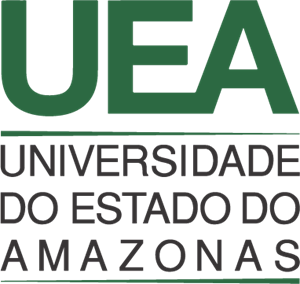

- Módulo: Machine Learning Aplicado I

- Equipe: [NAME]

- Alunos:
  
  - Andrew da Silva Santos
  - Eberth Felipe Castro da Cruz
  - Eduardo Amorim de Araújo




#Coding

##General Imports

In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Scikit-learn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
# from kaggle.api.kaggle_api_extended import KaggleApi
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, DistanceMetric
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

Install Shap

In [4]:
!pip install shap

     |████████████████████████████████| 356 kB 8.9 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491651 sha256=fc2c001a077f97516e24af9920de148027c6b6a0a7228c5b92bc4ff361bd542e
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


##Get data from Kaggle API
Reference: https://colab.research.google.com/github/corrieann/kaggle/blob/master/kaggle_api_in_colab.ipynb

###Install Kaggle and Import API

In [3]:
!pip install kaggle
from kaggle.api.kaggle_api_extended import KaggleApi

###Get Files

In [5]:
# Kaggle API reference: https://github.com/Kaggle/kaggle-api
def import_kaggle_api_key():
  from google.colab import files

  uploaded = files.upload()

  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    
  # Then move kaggle.json into the folder where the API expects to find it.
  !mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

def get_data_from_competition():
  # Kaggle competition link
  # https://www.kaggle.com/c/aml-t2-fw/data
  !kaggle competitions download -c aml-t2-fw
  !ls -la ./
  !unzip ./Dados_Teste.csv.zip
  !unzip ./Dados_Treino.csv.zip
  !ls -la ./

Run this function to import your API.

In order to get you key, got to **Kaggle** > Account > Create New API Token

Import `kaggle.json` file

In [6]:
import_kaggle_api_key()

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 68 bytes


In [7]:
get_data_from_competition()

# download em ambiente local
# !kaggle competitions download -c aml-t2-fw
# !unzip ./aml-t2-fw.zip


 44% 9.00M/20.3M [00:00<00:00, 16.3MB/s]
100% 20.3M/20.3M [00:00<00:00, 31.9MB/s]
  0% 0.00/114k [00:00<?, ?B/s]
100% 114k/114k [00:00<00:00, 64.6MB/s]
  0% 0.00/28.2k [00:00<?, ?B/s]
100% 28.2k/28.2k [00:00<00:00, 26.7MB/s]
  0% 0.00/2.30M [00:00<?, ?B/s]
100% 2.30M/2.30M [00:00<00:00, 158MB/s]
total 23268
drwxr-xr-x 1 root root     4096 Jul 23 03:39 .
drwxr-xr-x 1 root root     4096 Jul 23 03:33 ..
drwxr-xr-x 4 root root     4096 Jul 16 13:19 .config
-rw-r--r-- 1 root root  2410135 Jul 23 03:39 Dados_Teste.csv.zip
-rw-r--r-- 1 root root 21243109 Jul 23 03:39 Dados_Treino.csv.zip
-rw-r--r-- 1 root root    28910 Jul 23 03:39 Dicionario_de_Dados.csv
drwxr-xr-x 1 root root     4096 Jul 16 13:20 sample_data
-rw-r--r-- 1 root root   117176 Jul 23 03:39 Template_Submissao.csv
Archive:  ./Dados_Teste.csv.zip
  inflating: Dados_Teste.csv         
Archive:  ./Dados_Treino.csv.zip
  inflating: Dados_Treino.csv        
total 108712
drwxr-xr-x 1 root root     4096 Jul 23 03:39 .
drwxr-xr-x 1 root

##Datasets


###Initial view

In [8]:
df_dados_teste = pd.read_csv('./Dados_Teste.csv')
df_dados_treino = pd.read_csv('./Dados_Treino.csv')
df_dict_dados = pd.read_csv('./Dicionario_de_Dados.csv')
df_template_sub = pd.read_csv('./Template_Submissao.csv')

In [9]:
def explore_dataset(df_aux):
  delimiter = '--------------------'
  print(df_aux.shape)
  print(delimiter)
  print(round(df_aux.describe(), 2))
  print(delimiter)
  df_aux.info(verbose=True)

Dados de Treino

In [ ]:
df_dados_treino.head()

,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_id,pre_icu_los_days,...,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
0,214826,118,68.0,22.732803,0,2,1,180.3,92,0.541667,...,0.0,0.0,0,0,0,0,0,0,0,1
1,246060,81,77.0,27.421875,0,2,0,160.0,90,0.927778,...,51.0,51.0,0,0,0,0,0,0,0,1
2,262220,118,81.0,22.635548,1,2,0,165.1,92,0.000694,...,337.0,337.0,0,0,0,0,0,0,0,0
3,201746,33,19.0,0.000000,0,2,1,188.0,91,0.073611,...,0.0,0.0,0,0,0,0,0,0,0,0
4,182697,83,67.0,27.555611,0,2,1,190.5,95,0.000694,...,0.0,0.0,0,0,0,0,0,0,0,1


In [ ]:
explore_dataset(df_dados_treino)

(117141, 180)
--------------------
       encounter_id  hospital_id        age        bmi  elective_surgery  \
count     117141.00    117141.00  112653.00  113106.00         117141.00   
mean      213013.98       106.22      62.01      29.12              0.19   
std        38128.78        63.48      16.83       8.28              0.39   
min       147001.00         1.00       0.00      14.84              0.00   
25%       179951.00        50.00      52.00      23.60              0.00   
50%       213051.00       112.00      64.00      27.57              0.00   
75%       246063.00       165.00      75.00      32.82              0.00   
max       279000.00       204.00      89.00      67.81              1.00   

          height     icu_id  pre_icu_los_days  readmission_status     weight  \
count  115286.00  117141.00         117141.00            117141.0  114021.00   
mean      169.60     662.94              0.84                 0.0      83.81   
std        10.84     304.33             

Dados de Teste

In [ ]:
df_dados_teste.head()

,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,...,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
0,231640,42,35.0,29.060607,0,Caucasian,F,169.0,Emergency Department,Accident & Emergency,...,NaN,NaN,NaN,0,0,0,0,0,0,0
1,220057,100,84.0,23.128938,0,Caucasian,F,170.2,Emergency Department,Accident & Emergency,...,NaN,NaN,NaN,0,0,0,0,0,0,0
2,238466,128,61.0,42.873376,0,Caucasian,M,175.2,Emergency Department,Accident & Emergency,...,NaN,NaN,NaN,0,0,0,0,0,0,0
3,214794,77,86.0,25.795461,0,Caucasian,F,162.6,NaN,Floor,...,NaN,NaN,NaN,0,0,0,0,0,0,0
4,255804,110,38.0,41.868512,1,African American,F,170.0,Operating Room,Operating Room / Recovery,...,202.0,202.0,202.0,0,0,0,0,0,0,0


In [ ]:
explore_dataset(df_dados_teste)

(13016, 179)
--------------------
       encounter_id  hospital_id       age       bmi  elective_surgery  \
count      13016.00     13016.00  12516.00  12561.00          13016.00   
mean      212882.75       105.04     61.87     29.02              0.19   
std        37940.12        63.46     16.80      8.09              0.39   
min       147000.00         1.00      0.00     14.84              0.00   
25%       180537.25        47.00     52.00     23.61              0.00   
50%       212676.50       110.00     64.00     27.55              0.00   
75%       245433.25       163.00     75.00     32.61              0.00   
max       278994.00       204.00     89.00     67.81              1.00   

         height    icu_id  pre_icu_los_days  readmission_status    weight  \
count  12794.00  13016.00          13016.00             13016.0  12673.00   
mean     169.64    657.86              0.82                 0.0     83.66   
std       10.81    303.61              2.31                 0.0     

###ETL

Pré-processamento de dados de treino e teste

In [10]:
#Transform fields from Object to int
def transform_fields(df, fields):
  label_encoder = LabelEncoder()
  for field in fields:
    df[field] = label_encoder.fit_transform(list(df[field].values))
  return df

#Treat numeric values from dataframe
def str_to_num(df_aux, index):
  for i in index:
    col_name = df_aux.columns[i]
    # df_aux[col_name] = df_aux[col_name].str.replace('.', '')
    # df_aux[col_name] = df_aux[col_name].str.replace(',', '.')
    df_aux[col_name] = pd.to_numeric(df_aux[col_name])
  return df_aux

In [11]:
fields_to_tranform = ['ethnicity', 'gender']
df_dados_teste = transform_fields(df_dados_teste, fields_to_tranform)
df_dados_treino = transform_fields(df_dados_treino, fields_to_tranform)

# Change field type
df_dados_teste = str_to_num(df_dados_teste, [3])
df_dados_treino = str_to_num(df_dados_treino, [3])

In [12]:
#Remove columns
rm_columns = ['hospital_admit_source', 'icu_admit_source', 
              'icu_stay_type', 'icu_type', 'apache_2_diagnosis', 
              'apache_3j_diagnosis' ]

df_dados_teste.drop(columns=rm_columns, inplace=True)
df_dados_treino.drop(columns=rm_columns, inplace=True)

In [13]:
#Replace NaN values with 0
df_dados_teste = df_dados_teste.fillna(0)
df_dados_treino = df_dados_treino.fillna(0)

In [15]:
#Check NaN values
print(np.any(np.isnan(df_dados_teste)))
print(np.any(np.isnan(df_dados_treino)))

False
False


##Machine Learning Algorithms

Algoritmos utilizados para prever a presença de Diabetes em pacientes

### Utility Functions to help the process

In [16]:
def get_samples_for_train_test(X, y, div_size, random):
  X_tr, X_ts, y_tr, y_ts = train_test_split(X, 
                                            y,
                                            stratify = y,
                                            test_size=div_size, 
                                            random_state=random)
  print('Amostras de treino:')
  print(f' * X_train: {X_tr.shape}')
  print(f' * y_train: {y_tr.shape}')

  print('Amostras de teste:')
  print(f' * X_test: {X_ts.shape}')
  print(f' * y_test: {y_ts.shape}')
  return X_tr, X_ts, y_tr, y_ts

def create_knn_model(neighbors, X_tr, X_ts, y_tr, y_ts):
  model = KNeighborsClassifier(n_neighbors=neighbors)
  model.fit(X_tr, y_tr)
  print(f'Acurácia (Treino): {round(accuracy_score(y_tr, model.predict(X_tr)), 2)}')
  print(f'Acurácia (Teste): {round(accuracy_score(y_ts, model.predict(X_ts)), 2)}')
  print(classification_report(y_test, model.predict(X_test), target_names=['NO', 'YES']))
  return model

def create_tree_model(depth, X_tr, X_ts, y_tr, y_ts):
  tree_model = DecisionTreeClassifier(criterion='entropy',
                                    max_depth=depth,
                                    min_samples_split=2,
                                    random_state=0)

  tree_model.fit(X_tr, y_tr)

  print(f'Acurácia (Treino): {round(accuracy_score(y_tr, tree_model.predict(X_tr)), 2)}')
  print(f'Acurácia (Teste): {round(accuracy_score(y_ts, tree_model.predict(X_ts)), 2)}')
  print(classification_report(y_test, tree_model.predict(X_test), target_names=['NO', 'YES']))
  return tree_model


In [49]:
def upload_submit(path, msg):
  !kaggle competitions submit -c aml-t2-fw -f '{path}' -m f"Descrição: {msg}"

def send_submit(df, msg):
  now = datetime.now()
  timestamp = datetime.timestamp(now)
  df.to_csv(f'submit_{timestamp}.csv', index=False)
  upload_submit(f'submit_{timestamp}.csv', msg)


def update_df_template(df, df_result_test):
  df['diabetes_mellitus'] = df_result_test.loc[df_result_test['encounter_id'] == df['encounter_id']]['predict']
  return df

def get_dataframe_for_submission(model):
  df_result = df_dados_teste.copy()
  df_result_template = df_template_sub.copy()
  df_result['predict'] = model.predict_proba(df_result)[:,1]
  df_result_template = df_result_template.apply(lambda x: update_df_template(x, df_result), axis=1)
  df_result_template = df_result_template.astype({'encounter_id': 'int64'})
  return df_result_template

def view_result(df_result_view):
  # TODO: create confusion_matrix
  df_result_view = round(df_result_view, 2)
  plt.figure(figsize = (16,10))
  ax = sns.countplot(x = 'diabetes_mellitus', 
                    data = df_result_view, 
                    order = df_result_view['diabetes_mellitus'].value_counts().index)

  ax.set_title('Previsão de Pacientes Diabéticos')
  ax.set_xlabel('Diabético')
  ax.set_ylabel('Qtd. de pacientes')
  plt.xticks(rotation=45)
  plt.show()

In [18]:
now = datetime.now()
timestamp = datetime.timestamp(now)
print(f"submit_{timestamp}.csv")
  

submit_1627011668.591482.csv


### Treinamento dos Modelos

In [19]:
# Get data for X and y

# tentativa de normalização
# scaler = MinMaxScaler()

# X = df_dados_treino.loc[:,'encounter_id':'solid_tumor_with_metastasis']

# X[X.columns.values] = scaler.fit_transform(X[X.columns.values])

# X = X.to_numpy()

X = df_dados_treino.loc[:,'encounter_id':'solid_tumor_with_metastasis'].to_numpy()

y = df_dados_treino['diabetes_mellitus'].to_numpy()

In [20]:
print(X)

[[2.14826e+05 1.18000e+02 6.80000e+01 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [2.46060e+05 8.10000e+01 7.70000e+01 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [2.62220e+05 1.18000e+02 8.10000e+01 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 ...
 [2.19719e+05 7.00000e+00 7.30000e+01 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [2.22562e+05 1.70000e+02 8.10000e+01 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [1.57942e+05 7.00000e+00 3.50000e+01 ... 0.00000e+00 0.00000e+00
  0.00000e+00]]


In [21]:
X_train, X_test, y_train, y_test = get_samples_for_train_test(X, y, div_size=0.25, random=0)

Amostras de treino:
 * X_train: (87855, 173)
 * y_train: (87855,)
Amostras de teste:
 * X_test: (29286, 173)
 * y_test: (29286,)


#### KNN - k vizinhos mais próximos
Treino do Modelo utilizando a algoritmo KNN

In [29]:
print('****************** KNN ******************')

knn_model = create_knn_model(neighbors=20, X_tr=X_train, X_ts=X_test, y_tr=y_train, y_ts=y_test)

****************** KNN ******************
Acurácia (Treino): 0.79
Acurácia (Teste): 0.79
              precision    recall  f1-score   support

          NO       0.79      1.00      0.88     22952
         YES       0.59      0.03      0.05      6334

    accuracy                           0.79     29286
   macro avg       0.69      0.51      0.46     29286
weighted avg       0.74      0.79      0.70     29286



In [30]:
result_knn = get_dataframe_for_submission(knn_model)
result_knn.head()

,encounter_id,diabetes_mellitus
0,231640,0.30
1,220057,0.35
2,238466,0.15
3,214794,0.50
4,255804,0.05


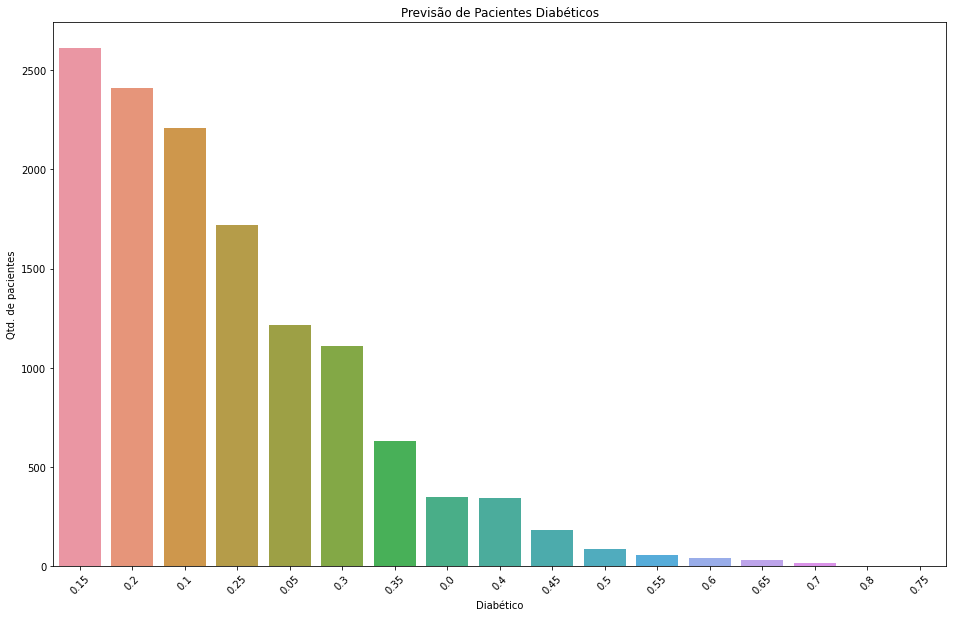

In [47]:
view_result(result_knn)

In [31]:
# envia para o kagle o df com o resultado gerado
send_submit(result_knn, 'Teste 4 knn')

100% 146k/146k [00:01<00:00, 114kB/s]
Successfully submitted to Machine Learning Aplicado I - Trabalho Final

#### Decision Tree
Treino do Modelo utilizando a algoritmo Árvore de decisão

In [36]:
print('****************** ARVORE ******************')

tree_model = create_tree_model(depth=5, X_tr=X_train, X_ts=X_test, y_tr=y_train, y_ts=y_test)

****************** ARVORE ******************
Acurácia (Treino): 0.81
Acurácia (Teste): 0.81
              precision    recall  f1-score   support

          NO       0.85      0.92      0.88     22952
         YES       0.59      0.41      0.48      6334

    accuracy                           0.81     29286
   macro avg       0.72      0.66      0.68     29286
weighted avg       0.79      0.81      0.80     29286



In [37]:
# gera o df para submissão com base no template
result_tree = get_dataframe_for_submission(tree_model)
result_tree.head()

,encounter_id,diabetes_mellitus
0,231640,0.020442
1,220057,0.628465
2,238466,0.303710
3,214794,0.123869
4,255804,0.249263


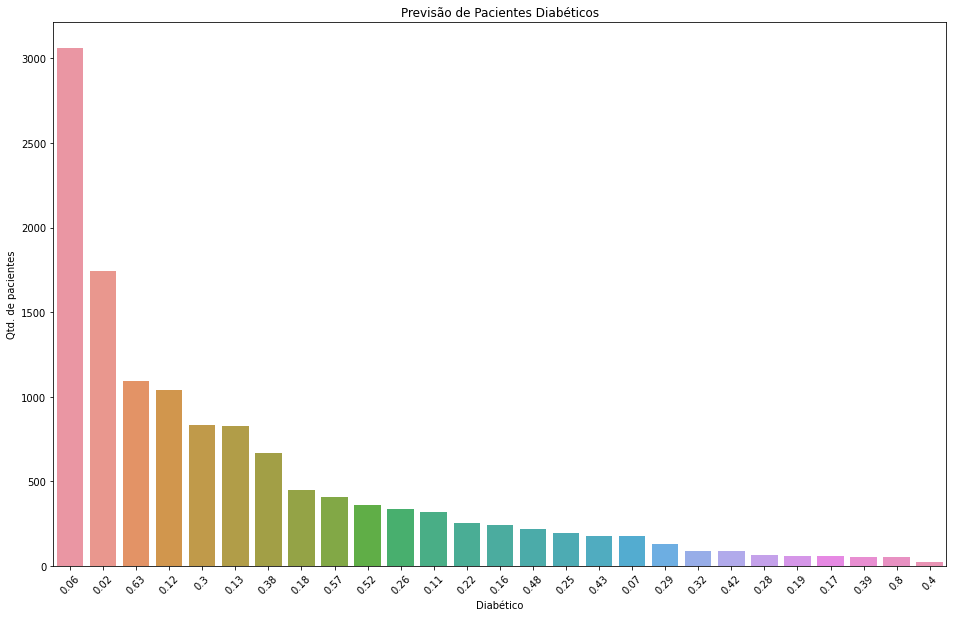

In [50]:
view_result(result_tree)

In [ ]:
# envia para o kagle o df com o resultado gerado
send_submit(result, 'Teste 2 decision tree')

100%|█████████████████████████████████████████| 337k/337k [00:02<00:00, 120kB/s]
Successfully submitted to Machine Learning Aplicado I - Trabalho Final